In [32]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import datetime
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
from pandas_datareader import data as pdr
import yfinance as yf
import os

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

df = pd.read_html(url)


df = df[0]

df = df.drop(columns=['Founded', 'Security', 'Headquarters Location', 'Date first added', 'CIK', 'SEC filings'])



In [2]:
start = 2019
end = 2020

tickers = ['ACLS', 'MU', 'TSM', 'MKSI', 'KLIC', 'ASML', 'MRVL', 'MXL', 'SNPS', 'CAMT']

nice_pairs = np.array([],dtype=object)

data = pdr.get_data_yahoo(tickers, datetime.datetime(start, 1, 1), 
                              datetime.datetime(end, 1, 1))['Close']

data = data.dropna(axis='columns')
for stock in data:
    for s in data:
        if stock != s and list(data.columns).index(stock) > list(data.columns).index(s):
            pair = coint(data[stock], data[s])
            if pair[1] < .5:
                        #and stock not in first and s not in second
                        #first.append(stock)
                        #second.append(s)
                        #print((stock, s))
                    #ok = np.append(nice_pairs, [stock, s, pair[1]])
                    nice_pairs = np.append(nice_pairs, [stock, s, pair[1]])

In [3]:
starts = range(2018, 2020)
ends = range(2019, 2021)
window1, window2 = 60,5
sectors = df['GICS Sector'].unique()
ticker_types = {i : df.loc[df['GICS Sector'] == i]['Symbol'] for i in sectors}
total_pairs = {year : {i : {'Pair Data': [], 'Sector Returns (Following Calendar Year)': 0.0}
                       for i in ticker_types} for year in starts}

In [4]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    money = 0
    countS1 = 0
    countS2 = 0
    trades = 0
    for i in range(len(ratios)):
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]

        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
    return round(money, 2)

In [5]:
for nums, (start, end) in enumerate(zip(starts, ends)):
    print(f'{round(nums/len(starts),0)*100}%')
    for num, sector in enumerate(ticker_types):
        first = []
        second = []
        print(f'\nGathering {sector} Data for {start}...')
        data = pdr.get_data_yahoo(ticker_types[sector], datetime.datetime(start, 1, 1), 
                              datetime.datetime(end, 1, 1))['Close']
        print(f'{sector} Data for {start} Successfully Collected!')
        print(f'\nfinding pairs for {sector} in {start}...\n')
        data = data.dropna(axis='columns')
        for stock in data:
            for s in data:
                if stock != s and list(data.columns).index(stock) > list(data.columns).index(s):
                    pair = coint(data[stock], data[s])
                    if pair[1] < .05:
                        #and stock not in first and s not in second
                        #first.append(stock)
                        #second.append(s)
                        #print((stock, s))
                            total_pairs[start][sector]['Pair Data'].append([(stock, s), pair[0], pair[1], sector])
        

0.0%

Gathering Industrials Data for 2018...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CARR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'OTIS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Industrials Data for 2018 Successfully Collected!

finding pairs for Industrials in 2018...


Gathering Health Care Data for 2018...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'OGN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Health Care Data for 2018 Successfully Collected!

finding pairs for Health Care in 2018...


Gathering Information Technology Data for 2018...
Information Technology Data for 2018 Successfully Collected!

finding pairs for Information Technology in 2018...


Gathering Communication Services Data for 2018...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FOXA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FOX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Communication Services Data for 2018 Successfully Collected!

finding pairs for Communication Services in 2018...


Gathering Consumer Discretionary Data for 2018...
Consumer Discretionary Data for 2018 Successfully Collected!

finding pairs for Consumer Discretionary in 2018...


Gathering Utilities Data for 2018...
Utilities Data for 2018 Successfully Collected!

finding pairs for Utilities in 2018...


Gathering Financials Data for 2018...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Financials Data for 2018 Successfully Collected!

finding pairs for Financials in 2018...


Gathering Materials Data for 2018...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CTVA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DOW', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Materials Data for 2018 Successfully Collected!

finding pairs for Materials in 2018...


Gathering Real Estate Data for 2018...
Real Estate Data for 2018 Successfully Collected!

finding pairs for Real Estate in 2018...


Gathering Consumer Staples Data for 2018...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Consumer Staples Data for 2018 Successfully Collected!

finding pairs for Consumer Staples in 2018...


Gathering Energy Data for 2018...
Energy Data for 2018 Successfully Collected!

finding pairs for Energy in 2018...

0.0%

Gathering Industrials Data for 2019...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CARR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'OTIS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Industrials Data for 2019 Successfully Collected!

finding pairs for Industrials in 2019...


Gathering Health Care Data for 2019...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'OGN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Health Care Data for 2019 Successfully Collected!

finding pairs for Health Care in 2019...


Gathering Information Technology Data for 2019...
Information Technology Data for 2019 Successfully Collected!

finding pairs for Information Technology in 2019...


Gathering Communication Services Data for 2019...
Communication Services Data for 2019 Successfully Collected!

finding pairs for Communication Services in 2019...


Gathering Consumer Discretionary Data for 2019...
Consumer Discretionary Data for 2019 Successfully Collected!

finding pairs for Consumer Discretionary in 2019...


Gathering Utilities Data for 2019...
Utilities Data for 2019 Successfully Collected!

finding pairs for Utilities in 2019...


Gathering Financials Data for 2019...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Financials Data for 2019 Successfully Collected!

finding pairs for Financials in 2019...


Gathering Materials Data for 2019...
Materials Data for 2019 Successfully Collected!

finding pairs for Materials in 2019...


Gathering Real Estate Data for 2019...
Real Estate Data for 2019 Successfully Collected!

finding pairs for Real Estate in 2019...


Gathering Consumer Staples Data for 2019...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Consumer Staples Data for 2019 Successfully Collected!

finding pairs for Consumer Staples in 2019...


Gathering Energy Data for 2019...
Energy Data for 2019 Successfully Collected!

finding pairs for Energy in 2019...



In [6]:
total_pairs

{2018: {'Industrials': {'Pair Data': [[('ALK', 'MMM'),
     -3.6917681943147462,
     0.018776682122563892,
     'Industrials'],
    [('ALLE', 'ALK'), -3.916041160380449, 0.009425250714890192, 'Industrials'],
    [('BA', 'MMM'), -3.6552551124389203, 0.02089732923822082, 'Industrials'],
    [('BA', 'ALK'), -3.6258003101697485, 0.022756817864708987, 'Industrials'],
    [('BA', 'ALLE'), -3.4743034031890967, 0.034742339121111764, 'Industrials'],
    [('BA', 'AAL'), -3.631539338596302, 0.022383665092365633, 'Industrials'],
    [('BA', 'AME'), -3.5741736891540685, 0.026362473566181696, 'Industrials'],
    [('BA', 'AOS'), -3.666852954734687, 0.020202219881929245, 'Industrials'],
    [('CHRW', 'AME'), -3.49531217119156, 0.03281322269837378, 'Industrials'],
    [('DAL', 'MMM'), -3.622876188386821, 0.022949006989298595, 'Industrials'],
    [('DAL', 'ALK'),
     -4.857377751485339,
     0.00029853277244720907,
     'Industrials'],
    [('DAL', 'ALLE'), -3.948207975781536, 0.008500271585660286, 'I

In [7]:
# FOR TESTING
'''
total_pairs = {
    2018: {'Industrials': {'Pair Data': [[('ACLS', 'ADBE'), .14, .0123, 'Industrials'],
                           [('ACLS', 'ADBE'), .14, .0123, 'Industrials'],
                           [('ACLS', 'ADBE'), .14, .0123, 'Industrials'],
                           [('ACLS', 'ADBE'), .14, .0123, 'Industrials']]
                           
                          }},
    2019: {'Health Care': {'Pair Data': [[('MSFT', 'AAPL'), .87, .043, 'Health Care'],
                           [('MSFT', 'AAPL'), .87, .043, 'Health Care'],
                           [('MSFT', 'AAPL'), .87, .043, 'Health Care'],
                           [('MSFT', 'AAPL'), .87, .043, 'Health Care']]
                           
                          }}
}

'''

for year in total_pairs:
    for sector in total_pairs[year]:
        for num, pairs in enumerate(total_pairs[year][sector]['Pair Data']):
            
            try:
                
                print(pairs)
                pair_data = yf.download([pairs[0][0], pairs[0][1]],datetime.datetime(year+1, 1, 1),
                                    datetime.datetime(year+2, 1, 1), progress=False)['Close']
            
                money = trade(pair_data[pairs[0][0]],pair_data[pairs[0][1]],window1, window2)
                pairs = pairs.append(money)
            
            except:
                pass
            
total_pairs


[('ALK', 'MMM'), -3.6917681943147462, 0.018776682122563892, 'Industrials']
[('ALLE', 'ALK'), -3.916041160380449, 0.009425250714890192, 'Industrials']
[('BA', 'MMM'), -3.6552551124389203, 0.02089732923822082, 'Industrials']
[('BA', 'ALK'), -3.6258003101697485, 0.022756817864708987, 'Industrials']
[('BA', 'ALLE'), -3.4743034031890967, 0.034742339121111764, 'Industrials']
[('BA', 'AAL'), -3.631539338596302, 0.022383665092365633, 'Industrials']
[('BA', 'AME'), -3.5741736891540685, 0.026362473566181696, 'Industrials']
[('BA', 'AOS'), -3.666852954734687, 0.020202219881929245, 'Industrials']
[('CHRW', 'AME'), -3.49531217119156, 0.03281322269837378, 'Industrials']
[('DAL', 'MMM'), -3.622876188386821, 0.022949006989298595, 'Industrials']
[('DAL', 'ALK'), -4.857377751485339, 0.00029853277244720907, 'Industrials']
[('DAL', 'ALLE'), -3.948207975781536, 0.008500271585660286, 'Industrials']
[('DAL', 'AAL'), -3.4787391075851732, 0.034327236207211384, 'Industrials']
[('DAL', 'BA'), -3.7974239941392387

[('URI', 'GD'), -3.4192535012089955, 0.0402565564700611, 'Industrials']
[('URI', 'GE'), -3.7514783143210986, 0.015712596464442504, 'Industrials']
[('VRSK', 'ROL'), -4.209715497696815, 0.003526070909097813, 'Industrials']
[('WAB', 'CTAS'), -3.5035913151071605, 0.032078351491994596, 'Industrials']
[('WAB', 'RHI'), -3.44253755073922, 0.03784072052371869, 'Industrials']
[('WM', 'UAL'), -3.8267120956115326, 0.012483966527970132, 'Industrials']
[('XYL', 'CHRW'), -3.364583120326607, 0.046439294997836986, 'Industrials']
[('XYL', 'HII'), -3.5761198908911833, 0.026218130370781644, 'Industrials']
[('XYL', 'LUV'), -3.5609414299990885, 0.02736207801673752, 'Industrials']
[('A', 'ABMD'), -4.573995511620069, 0.0009231833109965283, 'Health Care']
[('BAX', 'ALGN'), -4.137651128165767, 0.004525416030098595, 'Health Care']
[('CERN', 'CTLT'), -3.404653445234422, 0.04183623796733956, 'Health Care']
[('COO', 'AMGN'), -4.755606846469008, 0.00045154241817084564, 'Health Care']
[('COO', 'ANTM'), -4.34224725002

[('TFX', 'IDXX'), -3.861928956155958, 0.01118604476579306, 'Health Care']
[('TFX', 'INCY'), -3.675240631100606, 0.019712132255988404, 'Health Care']
[('TFX', 'ISRG'), -3.93458750272019, 0.008881499966038908, 'Health Care']
[('TFX', 'IQV'), -3.531306730704781, 0.02971920702377414, 'Health Care']
[('TFX', 'LH'), -3.6522283078343967, 0.021082124146368533, 'Health Care']
[('TFX', 'LLY'), -4.277764382878314, 0.002772482255851083, 'Health Care']
[('TFX', 'MCK'), -3.694574700920758, 0.018621746027566416, 'Health Care']
[('TFX', 'PKI'), -3.4334893902770545, 0.038764640631536736, 'Health Care']
[('TFX', 'PFE'), -4.451640442031362, 0.0014689533783552235, 'Health Care']
[('TFX', 'DGX'), -3.7546718689257528, 0.015561877175001279, 'Health Care']
[('TFX', 'RMD'), -3.862702640264098, 0.011158932189133388, 'Health Care']
[('TFX', 'STE'), -4.018112085795444, 0.006765583111624116, 'Health Care']
[('TFX', 'SYK'), -3.5152228409564614, 0.031069567043158115, 'Health Care']
[('TMO', 'ANTM'), -3.9089824001096

Exception in thread Thread-637:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/util/connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socket.py", line 953, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(

[('WST', 'COO'), -3.5577329239790236, 0.027609296419775994, 'Health Care']
[('WST', 'ISRG'), -3.525395795819566, 0.030209538088882625, 'Health Care']
[('ZTS', 'ABBV'), -3.8950512903842527, 0.010076449340428926, 'Health Care']
[('ZTS', 'CAH'), -4.0354343113208735, 0.006388469116219051, 'Health Care']
[('ZTS', 'CNC'), -3.498476519854201, 0.032530680648757734, 'Health Care']
[('ZTS', 'CRL'), -3.857141346701688, 0.011355127888732325, 'Health Care']
[('ZTS', 'XRAY'), -4.2114735024323044, 0.0035044414882182723, 'Health Care']
[('ZTS', 'DXCM'), -3.9892743405792808, 0.007438227637218178, 'Health Care']
[('ZTS', 'HCA'), -3.6108893526524817, 0.023751594148760588, 'Health Care']
[('ZTS', 'ILMN'), -3.407340188815837, 0.041541717119885704, 'Health Care']
[('ZTS', 'MCK'), -3.709052759936728, 0.01784008754885534, 'Health Care']
[('ZTS', 'STE'), -3.6480459596535155, 0.02133980332194299, 'Health Care']
[('ZTS', 'VTRS'), -3.3926376021238633, 0.0431748126678393, 'Health Care']
[('ZTS', 'WAT'), -4.0880654

[('PYPL', 'CDW'), -4.338684094654146, 0.002226814877016164, 'Information Technology']
[('PYPL', 'CTXS'), -3.7055102332580545, 0.018028644325351693, 'Information Technology']
[('PYPL', 'CTSH'), -3.350542569066664, 0.048148289833077285, 'Information Technology']
[('PYPL', 'GLW'), -3.798008546989696, 0.01363893332513571, 'Information Technology']
[('PYPL', 'EPAM'), -3.915976049458591, 0.00942721107148488, 'Information Technology']
[('PYPL', 'FFIV'), -3.638966392074473, 0.021908633159992474, 'Information Technology']
[('PYPL', 'FIS'), -4.117669080455644, 0.004845055788932022, 'Information Technology']
[('PYPL', 'FISV'), -3.7003182740978082, 0.018308144381490463, 'Information Technology']
[('PYPL', 'FTNT'), -3.6252821592118543, 0.022790771653553053, 'Information Technology']
[('PYPL', 'IT'), -3.973339147105712, 0.007835254443346821, 'Information Technology']
[('PYPL', 'HPE'), -3.554362372753482, 0.027871059435158538, 'Information Technology']
[('PYPL', 'INTU'), -3.5947512793260485, 0.024870

[('DIS', 'VZ'), -3.8374101305435953, 0.012076224983086121, 'Communication Services']
[('BBWI', 'APTV'), -3.8474430370353394, 0.011704629333730725, 'Consumer Discretionary']
[('BKNG', 'AZO'), -5.427166042658625, 2.5055887715961778e-05, 'Consumer Discretionary']
[('CZR', 'AMZN'), -3.4797138536961083, 0.03423658168183005, 'Consumer Discretionary']
[('DG', 'AAP'), -3.634017211879427, 0.0222241986404382, 'Consumer Discretionary']
[('DG', 'BKNG'), -3.62767254197605, 0.022634497499654342, 'Consumer Discretionary']
[('DPZ', 'AMZN'), -3.397380823410119, 0.042642214162329405, 'Consumer Discretionary']
[('DPZ', 'CZR'), -3.405409343949362, 0.04175320073692072, 'Consumer Discretionary']
[('DPZ', 'CMG'), -3.5220668370753043, 0.030488709549043383, 'Consumer Discretionary']
[('DPZ', 'DLTR'), -3.468118353344438, 0.03532822527920088, 'Consumer Discretionary']
[('EXPE', 'KMX'), -4.035372890944707, 0.00638977196321237, 'Consumer Discretionary']
[('GPS', 'AAP'), -3.386682777965194, 0.043851285620339346, 'C

[('ED', 'AES'), -4.220848659512317, 0.003391137181538025, 'Utilities']
[('ED', 'LNT'), -3.6089511883357837, 0.023883616662913755, 'Utilities']
[('ED', 'AEE'), -4.067029349033708, 0.005749297033637718, 'Utilities']
[('ED', 'AWK'), -3.5659302132949646, 0.026981457540747388, 'Utilities']
[('ED', 'ATO'), -4.109208562144975, 0.004986489903616556, 'Utilities']
[('ED', 'CNP'), -4.652024810166036, 0.0006814828010430493, 'Utilities']
[('ED', 'CMS'), -3.9100069559666775, 0.009608486807481293, 'Utilities']
[('DUK', 'AEP'), -4.562970530359624, 0.0009631996850586215, 'Utilities']
[('ETR', 'AES'), -4.144998479786045, 0.00441280908330948, 'Utilities']
[('ETR', 'AEE'), -3.856911450064647, 0.011363304059463177, 'Utilities']
[('ETR', 'AWK'), -4.3569228260579544, 0.002083900991445085, 'Utilities']
[('ETR', 'ATO'), -3.336435405050941, 0.04991733542510626, 'Utilities']
[('ETR', 'CMS'), -3.7644017954378195, 0.01511049091217626, 'Utilities']
[('EVRG', 'AES'), -3.7988347366349853, 0.013604410924137104, 'Utili

[('KEY', 'COF'), -3.679079857693076, 0.019491286110221016, 'Financials']
[('KEY', 'HBAN'), -3.5150496686866317, 0.031084385704551146, 'Financials']
[('L', 'ALL'), -3.3996231008140976, 0.04239234921103256, 'Financials']
[('L', 'AIG'), -3.4182468409130786, 0.04036384882997644, 'Financials']
[('L', 'BAC'), -3.5261274702639565, 0.030148471731571664, 'Financials']
[('L', 'BLK'), -3.4347359994772604, 0.03863623415362936, 'Financials']
[('L', 'COF'), -3.396896436941649, 0.04269635193478236, 'Financials']
[('L', 'SCHW'), -3.4481118598693232, 0.03728078497973089, 'Financials']
[('L', 'CFG'), -3.6731522705361312, 0.0198331754917123, 'Financials']
[('L', 'CME'), -4.034704068750374, 0.006403974575749828, 'Financials']
[('L', 'CMA'), -3.8318884890238336, 0.012285173800538939, 'Financials']
[('L', 'FITB'), -3.583809851167449, 0.025654416251606752, 'Financials']
[('L', 'HBAN'), -3.3453310225101327, 0.048795699321756654, 'Financials']
[('L', 'KEY'), -3.73383210445367, 0.016568776693591736, 'Financials

Exception in thread Thread-1549:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/util/connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socket.py", line 953, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request

[('SYF', 'FITB'), -3.586923400768119, 0.02542915983562525, 'Financials']
[('SYF', 'STT'), -3.9532529122702473, 0.008362840553726726, 'Financials']
[('TRV', 'IVZ'), -3.348361944669339, 0.048418312397970384, 'Financials']
[('TRV', 'LNC'), -3.602696433979179, 0.024314004330065617, 'Financials']
[('TRV', 'MTB'), -3.3694319638614383, 0.045860890121779505, 'Financials']
[('TRV', 'SBNY'), -3.6601955638954538, 0.02059872453018064, 'Financials']
[('TFC', 'CFG'), -3.44617608282331, 0.0374744374018414, 'Financials']
[('TFC', 'CME'), -3.4203208640410154, 0.040143055033578526, 'Financials']
[('TFC', 'FITB'), -3.9392361676545047, 0.008749696084748728, 'Financials']
[('TFC', 'HIG'), -3.5680960782051074, 0.026817631750787066, 'Financials']
[('WFC', 'HBAN'), -3.341757065729586, 0.04924381273870023, 'Financials']
[('WLTW', 'PGR'), -3.8218940389600453, 0.012671557307835068, 'Financials']
[('ZION', 'SCHW'), -3.3906368948770034, 0.04340111918941341, 'Financials']
[('DD', 'AVY'), -3.3661392255858695, 0.0462

Exception in thread Thread-1734:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/yfinance/multi.py", line 169, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/yfinance/multi.py", line 181, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib

[('FBHS', 'CHRW'), -4.486757370496178, 0.0012874946390034501, 'Industrials']
[('GD', 'MMM'), -3.4000085393862607, 0.04234952157949927, 'Industrials']
[('GD', 'AAL'), -3.3368406526075534, 0.04986578102909156, 'Industrials']
[('GD', 'EFX'), -3.381194983712728, 0.044482483990678064, 'Industrials']
[('GD', 'FTV'), -3.3910734803276923, 0.04335165157212667, 'Industrials']
[('HON', 'BA'), -3.53245697897061, 0.02962458369220844, 'Industrials']
[('HON', 'CHRW'), -3.9216955113134024, 0.009256395957912998, 'Industrials']
[('HWM', 'CHRW'), -3.8346790988903696, 0.012179174251308881, 'Industrials']
[('HWM', 'GNRC'), -3.4012629112361408, 0.042210392895762776, 'Industrials']
[('HII', 'ALLE'), -3.339264888228951, 0.049558291239976564, 'Industrials']
[('HII', 'CHRW'), -3.6389037830956346, 0.021912600789608057, 'Industrials']
[('HII', 'DOV'), -3.517611208655291, 0.03086580264232163, 'Industrials']
[('IEX', 'BA'), -3.7501994356230637, 0.01577331214019086, 'Industrials']
[('IEX', 'CHRW'), -3.52133229961369

[('UNP', 'ALLE'), -4.250143955221884, 0.0030584133795658872, 'Industrials']
[('UNP', 'AAL'), -3.820849552837734, 0.012712552544316323, 'Industrials']
[('UNP', 'AME'), -4.0258030174061155, 0.006595730535750062, 'Industrials']
[('UNP', 'AOS'), -3.589056992785312, 0.0252757852872613, 'Industrials']
[('UNP', 'BA'), -3.9298870098417455, 0.009016581757801425, 'Industrials']
[('UNP', 'CHRW'), -4.427797659706601, 0.001605436892137379, 'Industrials']
[('UNP', 'CAT'), -4.643884644224107, 0.0007035944338988928, 'Industrials']
[('UNP', 'CTAS'), -3.591044184444956, 0.025133651816257086, 'Industrials']
[('UNP', 'CPRT'), -3.789006667459381, 0.014020128722835788, 'Industrials']
[('UNP', 'CMI'), -4.033962935642717, 0.006419746102358395, 'Industrials']
[('UNP', 'DE'), -3.592721556063914, 0.025014214394481413, 'Industrials']
[('UNP', 'DAL'), -4.088494320562205, 0.005348777545267399, 'Industrials']
[('UNP', 'DOV'), -3.8119954315679347, 0.013064820453535226, 'Industrials']
[('UNP', 'ETN'), -4.2727331586664

[('GILD', 'BMY'), -4.040450171705086, 0.006282881106972223, 'Health Care']
[('GILD', 'CAH'), -4.016217738295333, 0.006808021733288811, 'Health Care']
[('GILD', 'CTLT'), -4.306048128958736, 0.0025053894306141626, 'Health Care']
[('GILD', 'CNC'), -4.6497842341557165, 0.0006875029453629243, 'Health Care']
[('GILD', 'CERN'), -4.15369909724535, 0.004282773896691944, 'Health Care']
[('GILD', 'CRL'), -4.067009909937297, 0.005749671772869154, 'Health Care']
[('GILD', 'CI'), -4.342522729129304, 0.0021960034446642917, 'Health Care']
[('GILD', 'COO'), -4.071948825796866, 0.005655170926685356, 'Health Care']
[('GILD', 'CVS'), -4.03701027731073, 0.006355121920065424, 'Health Care']
[('GILD', 'DHR'), -4.458246775518298, 0.0014330943462462305, 'Health Care']
[('GILD', 'DVA'), -3.9830654819755527, 0.007590713314922219, 'Health Care']
[('GILD', 'XRAY'), -4.274535573265141, 0.002804587419109357, 'Health Care']
[('GILD', 'DXCM'), -4.030867479140644, 0.00648599908236574, 'Health Care']
[('GILD', 'EW'), -4

[('IBM', 'DXC'), -3.718495524294558, 0.017345889194086805, 'Information Technology']
[('IBM', 'ENPH'), -3.490474025768445, 0.033249239506462004, 'Information Technology']
[('IBM', 'FFIV'), -3.695188116414315, 0.018588030906606857, 'Information Technology']
[('IBM', 'FIS'), -3.354810492821101, 0.04762339733773844, 'Information Technology']
[('IBM', 'FISV'), -3.3363698612009824, 0.049925677838677886, 'Information Technology']
[('IBM', 'FTNT'), -3.4782783674846582, 0.03437015713434017, 'Information Technology']
[('IBM', 'HPE'), -3.4382256815983987, 0.03827867762605405, 'Information Technology']
[('IBM', 'HPQ'), -3.706993137600553, 0.017949503185985774, 'Information Technology']
[('IBM', 'INTC'), -3.483327277057032, 0.03390228672109465, 'Information Technology']
[('INTU', 'CTSH'), -3.3518120424542186, 0.047991666519782025, 'Information Technology']
[('INTU', 'DXC'), -3.3676207874275925, 0.04607623806805381, 'Information Technology']
[('INTU', 'FFIV'), -3.405049921787923, 0.0417926669303059

[('CRM', 'INTC'), -4.391308404548976, 0.0018373074205890257, 'Information Technology']
[('CRM', 'INTU'), -3.395189918472677, 0.0428875385149046, 'Information Technology']
[('CRM', 'IPGP'), -4.221524614329784, 0.003383099295080975, 'Information Technology']
[('CRM', 'JNPR'), -3.8067668047393317, 0.013276882762559202, 'Information Technology']
[('CRM', 'KEYS'), -3.5012901426847582, 0.03228119134551613, 'Information Technology']
[('CRM', 'KLAC'), -3.6733210770230387, 0.019823367319194506, 'Information Technology']
[('CRM', 'LRCX'), -3.69153461715191, 0.018789627592535132, 'Information Technology']
[('CRM', 'MA'), -3.575258688048184, 0.02628191889319498, 'Information Technology']
[('CRM', 'MCHP'), -3.6400216748054124, 0.021841851910237343, 'Information Technology']
[('CRM', 'MSFT'), -3.6100015400504106, 0.023811991106457542, 'Information Technology']
[('CRM', 'MPWR'), -3.6668565757002467, 0.02020200604276796, 'Information Technology']
[('CRM', 'MSI'), -3.81948983832796, 0.01276609643314904

[('OMC', 'FB'), -3.971084127474646, 0.007892953876651565, 'Communication Services']
[('TMUS', 'CMCSA'), -4.555032214009566, 0.0009930123216727873, 'Communication Services']
[('TMUS', 'MTCH'), -3.5879446823782906, 0.025355644731103626, 'Communication Services']
[('TMUS', 'NFLX'), -4.207825278507295, 0.003549463603528332, 'Communication Services']
[('VZ', 'ATVI'), -4.247150312439252, 0.0030909817218723787, 'Communication Services']
[('VZ', 'GOOGL'), -3.6369973081117886, 0.022033715815357697, 'Communication Services']
[('VZ', 'GOOG'), -3.679649201842381, 0.01945871972937876, 'Communication Services']
[('VZ', 'EA'), -3.560398456214149, 0.027403780777126838, 'Communication Services']
[('DIS', 'FB'), -3.4755017697351374, 0.03462977722509624, 'Communication Services']
[('BKNG', 'BBWI'), -3.441901082390941, 0.03790510058994708, 'Consumer Discretionary']
[('CMG', 'BBWI'), -3.4456801552936307, 0.037524185190690125, 'Consumer Discretionary']
[('CMG', 'CCL'), -3.731909600929081, 0.0166644853359400

[('WHR', 'TGT'), -3.3999537963462436, 0.04235560210062547, 'Consumer Discretionary']
[('WHR', 'TSLA'), -3.347253984816411, 0.0485559868295901, 'Consumer Discretionary']
[('WHR', 'ULTA'), -4.172855988156694, 0.004008719475180404, 'Consumer Discretionary']
[('WYNN', 'CZR'), -3.3911093952755924, 0.043347584293461604, 'Consumer Discretionary']
[('WYNN', 'CCL'), -3.7575027492247868, 0.015429339625993042, 'Consumer Discretionary']
[('WYNN', 'NCLH'), -3.382951931923365, 0.04427958610343456, 'Consumer Discretionary']
[('YUM', 'MCD'), -3.4291086599701948, 0.03921871899201816, 'Consumer Discretionary']
[('YUM', 'PENN'), -3.700651471286472, 0.018290094195896354, 'Consumer Discretionary']
[('CMS', 'ATO'), -3.582354160566437, 0.025760318844384615, 'Utilities']
[('ED', 'AEE'), -3.369156600592686, 0.04589357682019471, 'Utilities']
[('EIX', 'ATO'), -3.372381397486125, 0.045511989093140734, 'Utilities']
[('EVRG', 'ETR'), -3.4972450520098906, 0.03264039103149151, 'Utilities']
[('ES', 'EVRG'), -3.4908907

Exception in thread Thread-3118:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/util/connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socket.py", line 953, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request

[('NTRS', 'BAC'), -3.4587611757808587, 0.03623043685668262, 'Financials']
[('PBCT', 'CB'), -3.344644046899631, 0.048881572448367876, 'Financials']
[('PNC', 'C'), -4.280419325141925, 0.0027463373906851268, 'Financials']
[('PNC', 'GL'), -3.540061463977595, 0.029005459820325916, 'Financials']
[('PFG', 'AFL'), -3.438131963241063, 0.038288243675860985, 'Financials']
[('PFG', 'AXP'), -3.3985415511941883, 0.042512717362409594, 'Financials']
[('PFG', 'AIG'), -3.342951894955339, 0.04909362572910056, 'Financials']
[('PFG', 'BK'), -3.8131501981391316, 0.013018392042306, 'Financials']
[('PFG', 'CBOE'), -3.3584827388944873, 0.04717555596477151, 'Financials']
[('PFG', 'SCHW'), -3.4084033121075286, 0.04142565645036445, 'Financials']
[('PFG', 'CME'), -3.4459938722032164, 0.037492708977265546, 'Financials']
[('PFG', 'CMA'), -3.6944943063910842, 0.01862616870481418, 'Financials']
[('PFG', 'FDS'), -3.6124451476958357, 0.02364607410542228, 'Financials']
[('PFG', 'ICE'), -3.3976080177978734, 0.042616841343

[('SPG', 'AMT'), -3.474218743474694, 0.03475030284145412, 'Real Estate']
[('SPG', 'DRE'), -4.129980301703286, 0.00464577361005963, 'Real Estate']
[('SPG', 'EQIX'), -3.947344647395578, 0.008523992098790368, 'Real Estate']
[('SPG', 'MAA'), -4.0069852322229425, 0.007018318898067658, 'Real Estate']
[('SPG', 'PLD'), -4.082356315486543, 0.005460636767955663, 'Real Estate']
[('SPG', 'SBAC'), -3.583360774760063, 0.025687046879766307, 'Real Estate']
[('UDR', 'DLR'), -3.4613110094597683, 0.03598267939370401, 'Real Estate']
[('UDR', 'EQR'), -3.8351009139969947, 0.012163222737345677, 'Real Estate']
[('UDR', 'ESS'), -3.6356547582220324, 0.02211935350375694, 'Real Estate']
[('UDR', 'PEAK'), -3.6820820034293176, 0.01932009783260164, 'Real Estate']
[('UDR', 'HST'), -4.485962405539827, 0.0012913601836518403, 'Real Estate']
[('UDR', 'IRM'), -3.745202028420276, 0.016012550912926582, 'Real Estate']
[('UDR', 'MAA'), -3.4593369430443337, 0.036174366458592254, 'Real Estate']
[('UDR', 'O'), -3.415825382612645

[('OKE', 'COP'), -3.407801060892678, 0.04149137064319741, 'Energy']
[('OKE', 'DVN'), -3.6564269520406896, 0.020826164056808302, 'Energy']
[('OKE', 'FANG'), -4.016450233567157, 0.006802800275502047, 'Energy']
[('OKE', 'EOG'), -3.8502446835419217, 0.011602695542002309, 'Energy']
[('OKE', 'XOM'), -3.7218065823034574, 0.017175463761370628, 'Energy']
[('OKE', 'HAL'), -3.59796589583376, 0.024643939481090067, 'Energy']
[('OKE', 'MRO'), -3.781100226997145, 0.014362670684033428, 'Energy']
[('OKE', 'MPC'), -3.3874313438275014, 0.04376576657899684, 'Energy']
[('OKE', 'OXY'), -3.9731684991289526, 0.007839607512681049, 'Energy']
[('PSX', 'FANG'), -3.582215853735209, 0.0257704003027763, 'Energy']
[('SLB', 'COP'), -3.394842518300229, 0.04292654605762094, 'Energy']
[('SLB', 'HAL'), -3.7998927801292703, 0.013560313388867722, 'Energy']
[('WMB', 'CTRA'), -4.476425716787271, 0.0013385844049392539, 'Energy']
[('WMB', 'EOG'), -3.38266206881711, 0.044313007345508706, 'Energy']
[('WMB', 'OXY'), -3.39345794987

{2018: {'Industrials': {'Pair Data': [[('ALK', 'MMM'),
     -3.6917681943147462,
     0.018776682122563892,
     'Industrials',
     68.97],
    [('ALLE', 'ALK'),
     -3.916041160380449,
     0.009425250714890192,
     'Industrials',
     220.51],
    [('BA', 'MMM'),
     -3.6552551124389203,
     0.02089732923822082,
     'Industrials',
     2746.89],
    [('BA', 'ALK'),
     -3.6258003101697485,
     0.022756817864708987,
     'Industrials',
     1743.91],
    [('BA', 'ALLE'),
     -3.4743034031890967,
     0.034742339121111764,
     'Industrials',
     -488.89],
    [('BA', 'AAL'),
     -3.631539338596302,
     0.022383665092365633,
     'Industrials',
     3807.13],
    [('BA', 'AME'),
     -3.5741736891540685,
     0.026362473566181696,
     'Industrials',
     1321.99],
    [('BA', 'AOS'),
     -3.666852954734687,
     0.020202219881929245,
     'Industrials',
     3889.91],
    [('CHRW', 'AME'),
     -3.49531217119156,
     0.03281322269837378,
     'Industrials',
     85.99],


In [52]:
ind_data = {}
pair_data = []
max_mins = {}
ret = []
sector_returns = {}

for year in total_pairs:
    for sec in total_pairs[year]:
        for p in total_pairs[year][sec]['Pair Data']:
            pair_data.append(p)
            ret.append(p[-1])
    
    #sector_returns[year] = pd.DataFrame([ [np.sum(ret), 
                             #np.std(ret)*np.sqrt(252)] for s in sectors ], columns = ['Total Returns', 
                                                                                      #'Volatility'], index = sectors)
    
    ind_data[year] = pd.DataFrame(pair_data, columns = 
                                  ['Pair', 'T-Stat', 'P-Value', 'Sector', 'Return'])
    pair_data.clear()
    ret.clear()
    
    max_mins[year] = (min(ind_data[year]['Return']), max(ind_data[year]['Return']))

ind_data[2018]

,Pair,T-Stat,P-Value,Sector,Return
0,"(ALK, MMM)",-3.691768,0.018777,Industrials,68.97
1,"(ALLE, ALK)",-3.916041,0.009425,Industrials,220.51
2,"(BA, MMM)",-3.655255,0.020897,Industrials,2746.89
3,"(BA, ALK)",-3.625800,0.022757,Industrials,1743.91
4,"(BA, ALLE)",-3.474303,0.034742,Industrials,-488.89
...,...,...,...,...,...
847,"(CVX, BKR)",-3.377029,0.044967,Energy,635.45
848,"(CTRA, COP)",-3.507981,0.031694,Energy,9.09
849,"(EOG, DVN)",-3.380853,0.044522,Energy,246.58
850,"(XOM, APA)",-3.395631,0.042838,Energy,-57.46


In [45]:
for num, year in enumerate(ind_data):
    
    out_path = "C:/Users/rhyslogan/Desktop/Pairs_Trading/sp500-pairs-excel-1.xlsx"
    
    writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
    
    if not os.path.exists(out_path):
        ind_data[year].to_excel(writer, sheet_name=f'sp500 {year} to {year+1} -pairs')
        writer.save()
    else:
        break
    

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/rhyslogan/Desktop/Pairs_Trading/sp500-pairs-excel-1.xlsx'

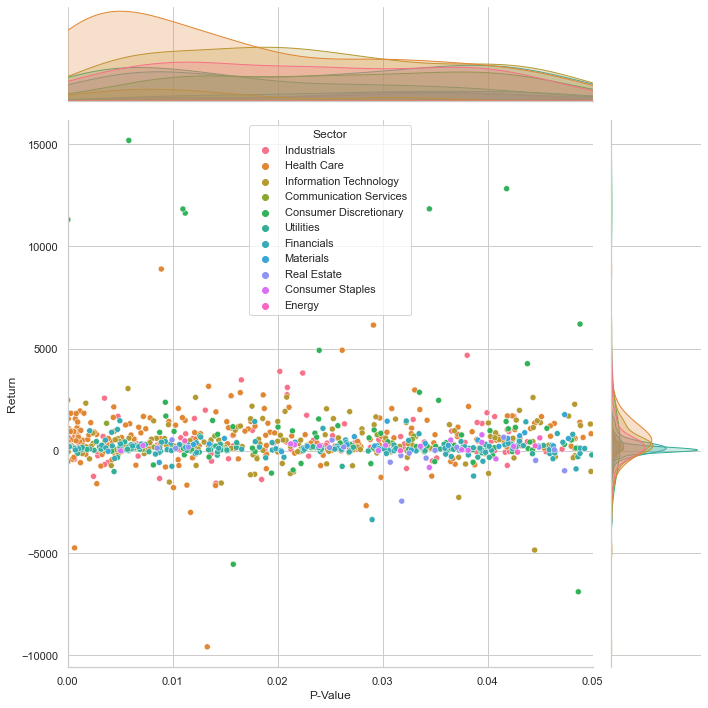

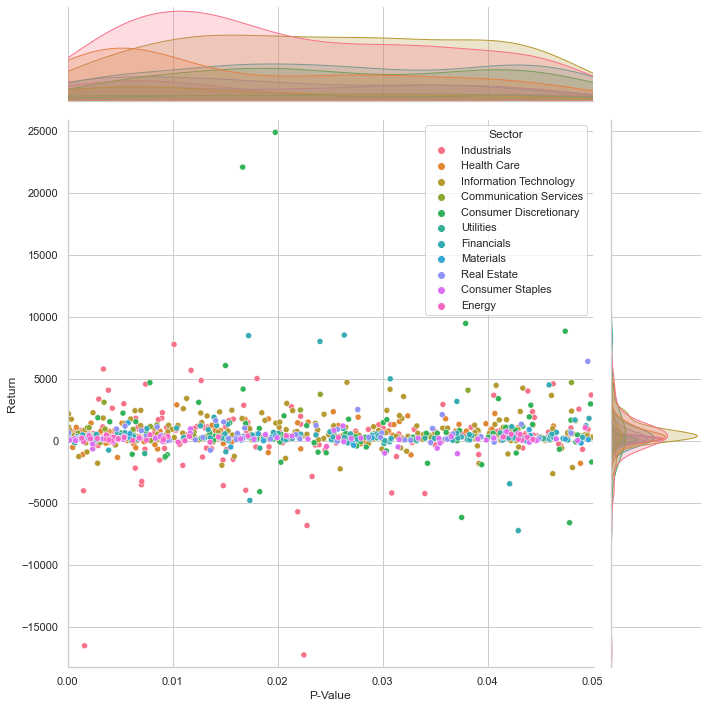

In [50]:
p1 = sns.jointplot(x="P-Value", y="Return", data=ind_data[2018],
                  kind="scatter",
                  xlim=(0, .05), ylim=(max_mins[2018][0]-1000, max_mins[2018][1]+1000), hue = "Sector", 
                  color="m", height=10)

p2 = sns.jointplot(x="P-Value", y="Return", data=ind_data[2019],
                  kind="scatter", 
                  xlim=(0, .05), ylim=(max_mins[2019][0]-1000, max_mins[2019][1]+1000), hue = "Sector", 
                  color="m", height=10)

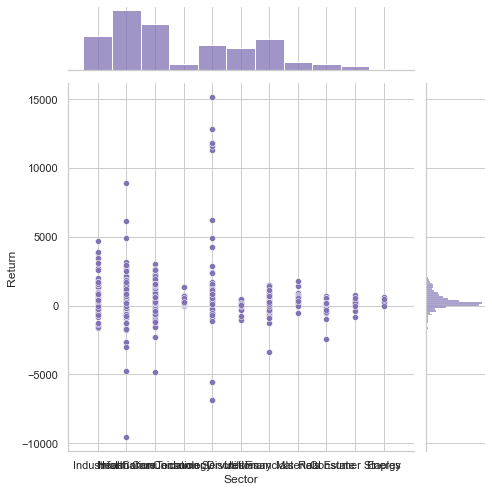

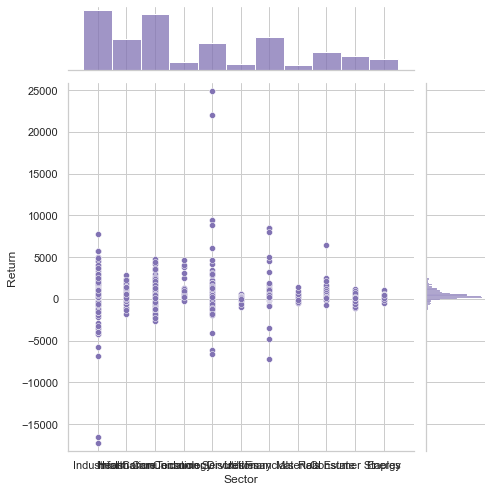

In [45]:


g1 = sns.jointplot(x="Sector", y="Return", data=ind_data[2018],
                  kind="scatter", ylim=(max_mins[2018][0]-1000, max_mins[2018][1]+1000),
                  color="m", height=7)

g2 = sns.jointplot(x="Sector", y="Return", data=ind_data[2019],
                  kind="scatter", ylim=(max_mins[2019][0]-1000, max_mins[2019][1]+1000),
                  color="m", height=7)


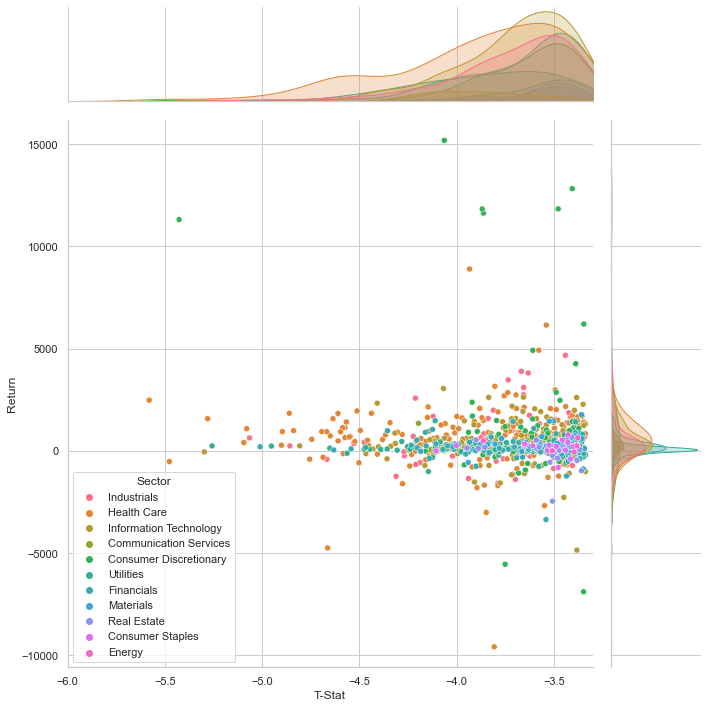

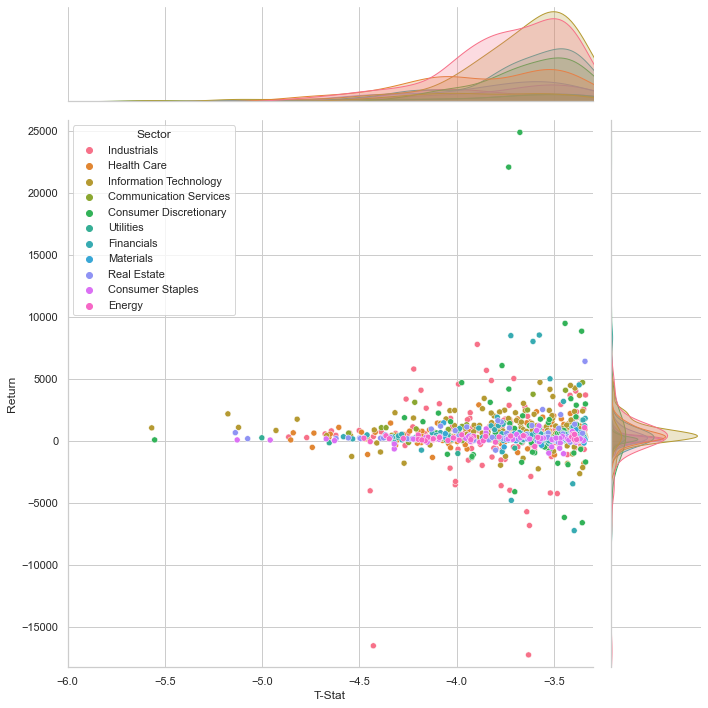

In [17]:
p1 = sns.jointplot(x="T-Stat", y="Return", data=ind_data[2018],
                  kind="scatter",
                  xlim=(-6, -3.3), ylim=(max_mins[2018][0]-1000, max_mins[2018][1]+1000), hue = "Sector", 
                  color="m", height=10)

p2 = sns.jointplot(x="T-Stat", y="Return", data=ind_data[2019],
                  kind="scatter",
                  xlim=(-6, -3.3), ylim=(max_mins[2019][0]-1000, max_mins[2019][1]+1000), hue = "Sector", 
                  color="m", height=10)

In [120]:

set1 = set(ind_data[2018]['Pair'])

set2 = set(ind_data[2019]['Pair'])

intersect = list(set1.intersection(set2))

common_pairs = pd.DataFrame()

common_pair_returns = []

for i in intersect:

    common_pair_returns.append([i, float(ind_data[2018].loc[ ind_data[2018]['Pair'] == i ]['Return']), 
                               float(ind_data[2019].loc[ ind_data[2019]['Pair'] == i ]['Return']), 
                               ind_data[2019].loc[ ind_data[2019]['Pair'] == i ]['Sector'].to_list()[0]])
    


common_pairs = pd.DataFrame(common_pair_returns, columns = ['Pair', '2018 Return', '2019 Return', 'Sector'])

common_pairs = common_pairs.dropna(axis='rows', inplace = False)


common_pairs




,Pair,2018 Return,2019 Return,Sector
0,"(FE, EVRG)",82.37,-102.28,Utilities
1,"(PLD, DRE)",156.94,180.09,Real Estate
2,"(JPM, C)",291.40,185.23,Financials
3,"(CHRW, AME)",85.99,208.92,Industrials
5,"(LUV, CHRW)",414.95,307.85,Industrials
6,"(VRSK, ROL)",-663.99,753.10,Industrials
7,"(ISRG, HUM)",1131.91,926.08,Health Care
8,"(WAT, LLY)",1414.65,2891.95,Health Care
9,"(SRE, LNT)",300.40,595.77,Utilities
10,"(ROP, DAL)",1992.40,5018.41,Industrials


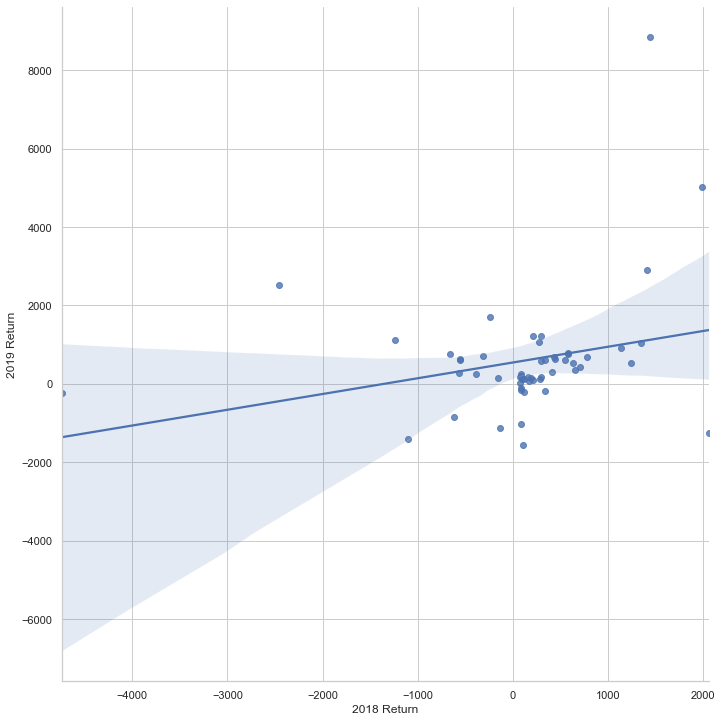

In [126]:
p2 = sns.lmplot(x="2018 Return", y="2019 Return", data=common_pairs, 
                  #xlim=(max_mins[2018][0]-1000, max_mins[2018][1]+1000), 
                  #ylim=(max_mins[2019][0]-1000, max_mins[2019][1]+1000),
                  height=10)